# Trabajo Practico 1
* Saez, Lautaro Andres

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Ejercicio 1: Sensor LIDAR

### b.
Con la primer trama setea el modo de operacion en:
1. Varido de 0 a 180 grados
2. Resolucion de 1 grado

La segunda trama comienza la transmision continua

In [3]:
from os.path import join
dataset_path = './dataset/'
rawDataset4 = join( dataset_path, 'rawDataset4')
rawDataset5 = join( dataset_path, 'rawDataset5')
name_data = [   'TimeLaser', 
                'TiempoInicialCamara',
                'TiempoInicialCamaraCPU',
                'TiempoInicialLaser',
                'TimeCamara',
                'DataLaser'
               ]
col_names = {
    name_data[0]: [],
    name_data[1]: [],
    name_data[2]: [],
    name_data[3]: [],
    name_data[4]: [],
    name_data[5]: []
}

In [4]:
def get_df( folder_path, data_names, col_names ):
    df = pd.DataFrame( col_names )
    for archive_name in data_names:
        path = join( folder_path, archive_name+'.xlsx' )
        data_aux = pd.read_excel( path, header=None )
        df[ archive_name ] = data_aux[0]
    return df
def convertir_valores( datos ):
    mediciones = [];
    for i in range( len(datos)//2 ):
        i_ajustada = i * 2
        mediciones.append( ( datos[ i_ajustada + 1 ] & 31 )*255 + ( datos[ i_ajustada ] ) )
    return np.transpose( mediciones )

def crear_df( df_datos ):
    mediciones = []
    for numero_medicion in df_datos:
        mediciones_crudas = list( df_datos[ numero_medicion ] )
        mediciones_crudas = filtrar_valores_estaticos( mediciones_crudas ) 
        mediciones_tratadas = convertir_valores( mediciones_crudas ) / 100
        mediciones.append( mediciones_tratadas )
    
    return mediciones

def filtrar_valores_estaticos( datos ):
    datos = datos[7::]
    for i in range(3):
        datos.pop()
    return datos

In [5]:
df_4 = pd.read_excel( join( rawDataset4, 'DataLaser.xlsx' ), header=None )
df_5 = pd.read_excel( join( rawDataset5, 'DataLaser.xlsx' ), header=None )

In [6]:
mediciones = crear_df( df_4 )
mediciones_5 = crear_df( df_5 )

In [7]:
theta = np.arange( 0, np.pi+np.pi/180, np.pi/180 )
#for medicion, index in zip( mediciones, range( len( mediciones )  )):
    #path = join( './Imagenes/dataset4', 'medicion_' + str(index) + '.jpg' )
    #crear_plot_radial( theta, medicion, 10 ,path)

In [8]:
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from IPython.display import HTML
import seaborn as sns

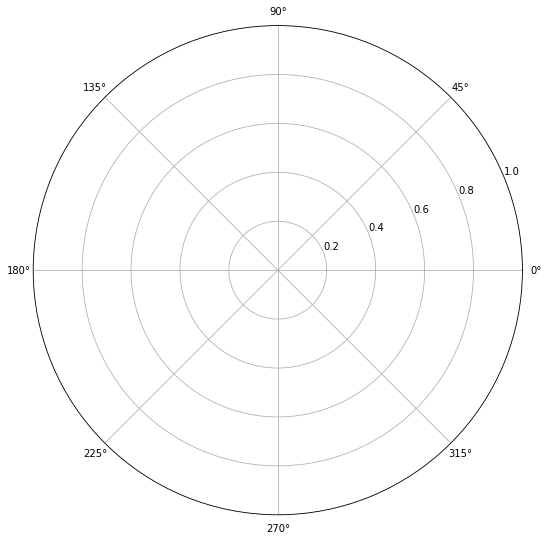

In [9]:
fig = plt.figure( figsize=(16,9) )
ax = fig.gca( polar=True )
def animate(i):
    ax.cla()
    ax.scatter( theta, mediciones[i], color='k', marker='^' )
    ax.set_rmax(10)
    ax.set_thetamin(-10)    
    ax.set_thetamax(190)
def animate_2(i):
    ax.cla()
    ax.scatter( theta, mediciones_5[i], color='k', marker='^' )
    ax.set_rmax(10)
    ax.set_thetamin(-10)    
    ax.set_thetamax(190)
    

In [10]:
graficar = input('desea graficar?: ')
if graficar=='si':
    anim = FuncAnimation(fig, animate, frames=512)
    anim.save('./archivo_final_4.mp4', writer='ffmpeg', fps=30)
    HTML( anim.to_jshtml() )

desea graficar?: no


In [11]:
graficar = input('desea graficar?: ')
if graficar=='si':
    anim = FuncAnimation(fig, animate_2, frames=506)
    anim.save('./archivo_final_3.mp4', writer='ffmpeg', fps=30)
    HTML( anim.to_jshtml() )

desea graficar?: no


In [12]:
from skimage import io
import cv2

In [28]:
def aplicar_medicion( imagen, mediciones, point ):
    dimensiones = list( imagen.shape )
    dimensiones.pop()
    
    A = ( dimensiones[1] -1 ) / ( 101 - 79 )
    B = -79 * A
    d = lambda fi, ro:  ro * np.cos( np.pi*(fi - 90) / 180 ) 
    theta = lambda d: np.arctan( 14 / (d) ) * 180 / np.pi
    
    B_fil = (dimensiones[0] - 1) / 2
    A_fil =  B_fil / 8
    
    fila = lambda theta: int( A_fil * theta + B_fil )
    col = lambda fi: int( A*fi + B )
 
    for medicion ,i in zip( mediciones, range( len( mediciones ) ) ):
        d_medicion = d( i + 79, medicion * 100 )
        theta_medicion = theta( d_medicion )
    
        
        col_obtenida = col( i + 79 ) 
        fila_obtenida = fila( theta_medicion ) 
        
        for j in range( point ) :
            for k in range( point ) :
                if( abs(fila_obtenida)+j<480 and col_obtenida+k<640 ):
                        imagen[fila_obtenida+j][col_obtenida+k][0] = 21
                        imagen[fila_obtenida+j][col_obtenida+k][1] = 233
                        imagen[fila_obtenida+j][col_obtenida+k][2] = 214
                    
                    
    return imagen

def crear_video( video_path, save_path ,mediciones ):
    
    captura = cv2.VideoCapture( video_path )
    out = cv2.VideoWriter( save_path ,cv2.VideoWriter_fourcc(*'XVID'),20.0,(640,480))
    i  = 0
    while( captura.isOpened() ):
        ref, frame = captura.read()
        if ref:
            sub_mediciones = mediciones[i][79:102]
            i += 1
            frame = aplicar_medicion( frame, sub_mediciones, 7 )
            cv2.imshow( 'dataset', frame )
            out.write( frame )
            if cv2.waitKey(30) == ord('s'):
                break
        else:
            break
    captura.release()
    cv2.destroyAllWindows()

In [34]:
crear_video( './dataset/rawDataset4/video.avi', './Multimedia/LIDAR/video_raw_dataset_4.avi' ,mediciones )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


In [35]:
crear_video( './dataset/rawdataset5/video.avi', './Multimedia/LIDAR/video_raw_dataset_5.avi' ,mediciones_5 )